## Analysis of data on baby names in the US from 1880 to 2020

Files can be accessed on https://www.ssa.gov/oact/babynames/limits.html

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import sys
sys.path.append(r'c:\users\saltanat.ospanova\appdata\local\packages\pythonsoftwarefoundation.python.3.9_qbz5n2kfra8p0\localcache\local-packages\python39\site-packages')
import seaborn as sns

In [3]:
# Concatenating dataset into one dataframe.
years = range(1880, 2021)

pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = 'babynames/yob%d.txt' % year
    df = pd.read_csv(path, names=columns)
    df['year'] = year
    pieces.append(df)

names = pd.concat(pieces, ignore_index=True)

In [4]:
names.tail()

,name,sex,births,year
2020858,Zykell,M,5,2020
2020859,Zylus,M,5,2020
2020860,Zymari,M,5,2020
2020861,Zyn,M,5,2020
2020862,Zyran,M,5,2020


10 most popular names in last 140 years

In [5]:
top10 = names.groupby('name').agg({'births': 'sum'}).sort_values(by='births', ascending=False)[:10]
top10

,births
name,
James,5213689
John,5163958
Robert,4849738
Michael,4405274
William,4159868
Mary,4145486
David,3651803
Joseph,2641826
Richard,2578808


<AxesSubplot:title={'center':'The most popular name'}, xlabel='year', ylabel='births'>

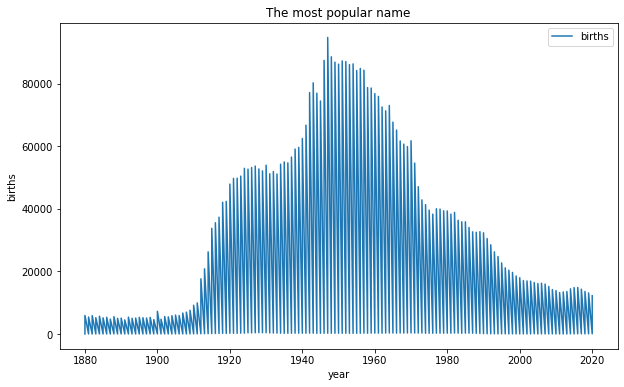

In [6]:
james = names[names['name'] == 'James']
james.plot(x='year', y='births', title='The most popular name', ylabel='births', figsize=(10,6))

Let's see top 10 names in 2020

In [7]:
year2020 = names[names['year'] == 2020]
year2020 = year2020.groupby('name').agg({'births': 'sum'}).sort_values(by='births', 
                                                                       ascending=False)[:10]
year2020

,births
name,
Liam,19690
Noah,18557
Olivia,17547
Emma,15598
Oliver,14170
Ava,13095
Elijah,13064
Charlotte,13009
Sophia,12987


In [9]:
year2020.reset_index(inplace=True)

[Text(0.5, 1.0, 'Top 10 names in 2020 in the US')]

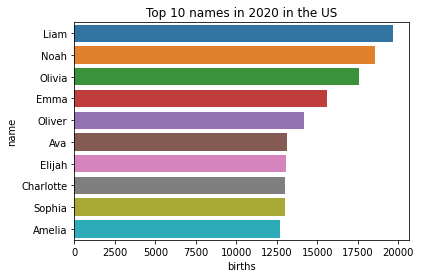

In [10]:
top10plot = sns.barplot(x='births', y='name', data=year2020, orient='h')
top10plot.set(title='Top 10 names in 2020 in the US')

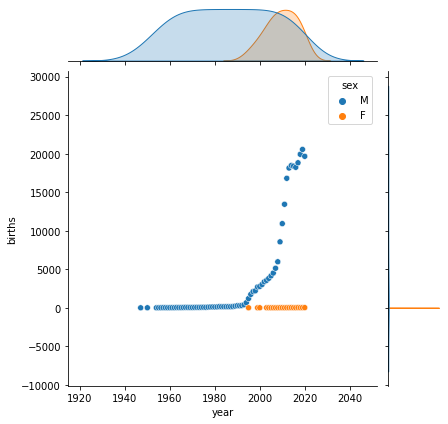

In [11]:
liam = names[names['name'] == 'Liam']
sns.jointplot(x='year', y='births', data=liam, hue='sex')

<AxesSubplot:title={'center':'Girls with a name Liam'}, xlabel='year', ylabel='births'>

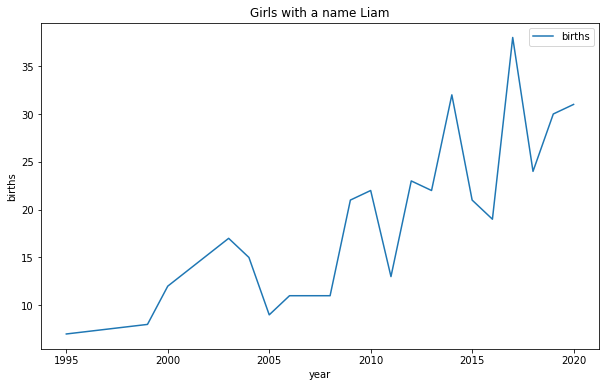

In [12]:
# Let's see the trend on girls with a name Liam
liam_girls = liam[liam['sex'] == 'F']
liam_girls.plot(x='year', y='births', title='Girls with a name Liam', ylabel='births', figsize=(10,6))

In [13]:
# Total births of boys and girls every year
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc=sum)
total_births.tail()

sex,F,M
year,,
2016,1768360,1893917
2017,1722140,1846154
2018,1695654,1810309
2019,1670419,1785527
2020,1598836,1706423


<AxesSubplot:title={'center':'Total births by sex'}, xlabel='year', ylabel='births'>

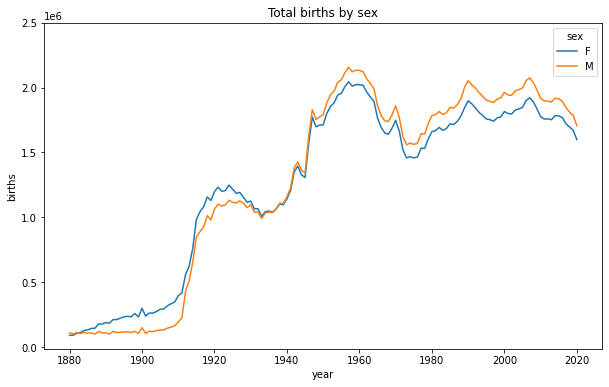

In [14]:
total_births.plot(title='Total births by sex', ylabel='births', 
                  yticks=np.linspace(0, 2500000, 6), figsize=(10,6))

In [15]:
#Adding column with fraction of babies given each name relative to total number for that year

def add_prop(group):
    group['prop'] = group.births / group.births.sum()
    return group
names = names.groupby(['year', 'sex']).apply(add_prop)
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
2020858,Zykell,M,5,2020,0.000003
2020859,Zylus,M,5,2020,0.000003
2020860,Zymari,M,5,2020,0.000003
2020861,Zyn,M,5,2020,0.000003


In [16]:
# Checking if prop column sums to 1 
names.groupby(['year', 'sex']).agg({'prop': 'sum'})

prop
year sex      
1880 F     1.0
     M     1.0
1881 F     1.0
     M     1.0
1882 F     1.0
...        ...
2018 M     1.0
2019 F     1.0
     M     1.0
2020 F     1.0
     M     1.0

[282 rows x 1 columns]

In [17]:
# Get the top male and female names for each year
def get_top(group):
    return group.sort_values(by='births', ascending=False)[:1]
top = names.groupby(['year', 'sex']).apply(get_top)
top

name sex  births  year      prop
year sex                                            
1880 F   0          Mary   F    7065  1880  0.077642
     M   942        John   M    9655  1880  0.087383
1881 F   2000       Mary   F    6919  1881  0.075245
     M   2938       John   M    8769  1881  0.087048
1882 F   3934       Mary   F    8148  1882  0.075551
...                  ...  ..     ...   ...       ...
2018 M   1943489    Liam   M   19924  2018  0.011006
2019 F   1957562  Olivia   F   18508  2019  0.011080
     M   1975510    Liam   M   20555  2019  0.011512
2020 F   1989592  Olivia   F   17535  2020  0.010967
     M   2006952    Liam   M   19659  2020  0.011521

[282 rows x 5 columns]

[(0.0, 0.1), Text(0.5, 1.0, 'Prop of the most popular names by sex and year')]

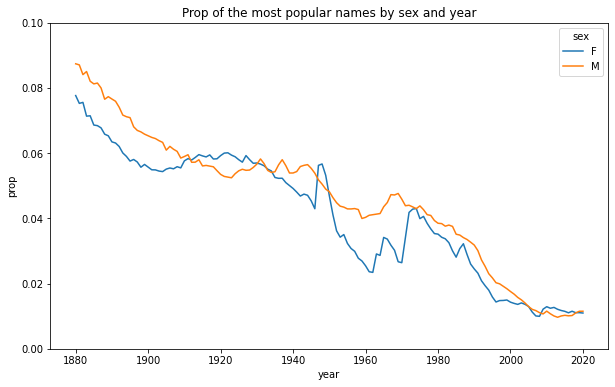

In [18]:
# The proportion of the most popular name throughout years
plt.figure(figsize=(10, 6))
plot = sns.lineplot(x='year', y='prop', data=top, hue='sex')
plot.set(ylim=(0, 0.1), title='Prop of the most popular names by sex and year')

Extracting top 1000 names for further analysis

In [19]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]
top1000 = names.groupby(['year', 'sex']).apply(get_top1000)
top1000.reset_index(inplace=True, drop=True)

In [20]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
281871,Willie,M,211,2020,0.000124
281872,Kylian,M,211,2020,0.000124
281873,Turner,M,211,2020,0.000124
281874,Rogelio,M,210,2020,0.000123


In [21]:
total_births = top1000.pivot_table('births', index='year', columns='name', aggfunc=sum)

array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>],
      dtype=object)

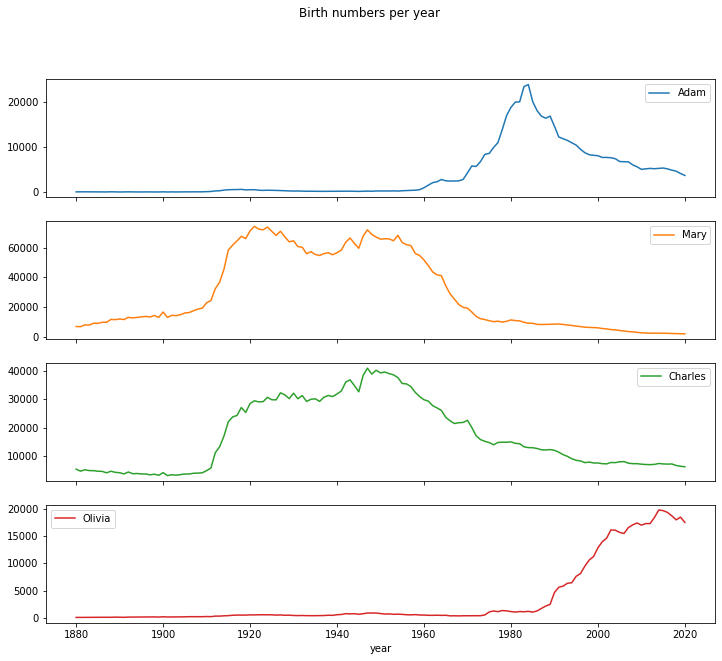

In [22]:
subset = total_births[['Adam', 'Mary', 'Charles', 'Olivia']]
subset.plot(subplots=True, figsize=(12,10), grid=False, title='Birth numbers per year')

<AxesSubplot:title={'center':'Prop by year and sex'}, xlabel='year', ylabel='prop'>

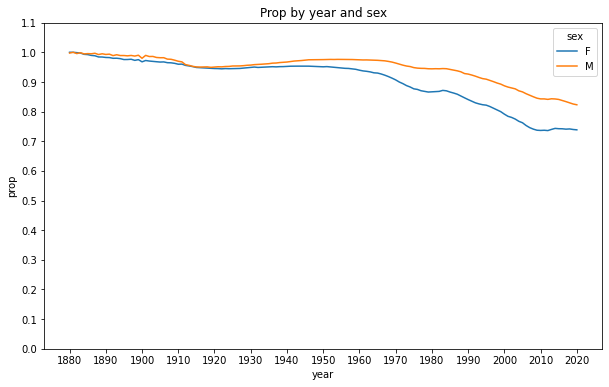

In [23]:
# The proportion of the top 1000 names throughout years
prop_table = top1000.pivot_table('prop', index='year', columns='sex', aggfunc=sum)
prop_table.plot(title='Prop by year and sex', yticks=np.linspace(0, 1.1, 12), 
                xticks=range(1880, 2030,10), figsize=(10,6), ylabel='prop')

Name diversity is increasing over time. Below the number of distinct names, taken in order of popularity from highest to lowest, in the top 50% of births.

In [24]:
# Boys in 2020
boys = top1000[top1000['sex'] == 'M']
df = boys[boys['year'] == 2020]
df

,name,sex,births,year,prop
280876,Liam,M,19659,2020,0.011521
280877,Noah,M,18252,2020,0.010696
280878,Oliver,M,14147,2020,0.008290
280879,Elijah,M,13034,2020,0.007638
280880,William,M,12541,2020,0.007349
...,...,...,...,...,...
281871,Willie,M,211,2020,0.000124
281872,Kylian,M,211,2020,0.000124
281873,Turner,M,211,2020,0.000124
281874,Rogelio,M,210,2020,0.000123


In [25]:
prop = df.sort_values(by='prop', ascending=False).prop.cumsum()
prop[:10]

280876    0.011521
280877    0.022217
280878    0.030507
280879    0.038145
280880    0.045495
280881    0.052673
280882    0.059785
280883    0.066396
280884    0.072670
280885    0.078618
Name: prop, dtype: float64

In [26]:
# How many of the most popular names to reach 50%?
prop.values.searchsorted(0.5)

162

In [27]:
prop[162:163]

281038    0.500728
Name: prop, dtype: float64

In [28]:
# Let's check this value for 1920
df = boys[boys['year'] == 1920]
prop = df.sort_values(by='prop', ascending=False).prop.cumsum()
prop.values.searchsorted(0.5)

30

In [29]:
def get_quantile(group, q=0.5):
    prop = group.sort_values(by='prop', ascending=False).prop.cumsum()
    return prop.values.searchsorted(0.5)

gb = top1000.groupby(['year', 'sex']).apply(get_quantile)
gb = gb.unstack('sex')
gb

sex,F,M
year,,
1880,37,13
1881,37,13
1882,37,14
1883,38,14
1884,38,15
...,...,...
2016,248,138
2017,253,142
2018,258,148


<AxesSubplot:title={'center':'Number of popular names in top 50%'}, xlabel='year'>

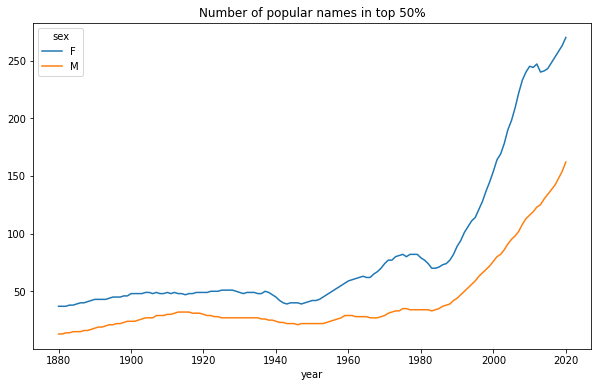

In [30]:
gb.plot(title='Number of popular names in top 50%', figsize=(10,6))

Analysing last letter of the names

In [31]:
get_last_letter = lambda x: x[-1]
last_letters = names['name'].map(get_last_letter)
last_letters.name = 'last_letter'
last_letters

0          y
1          a
2          a
3          h
4          e
          ..
2020858    l
2020859    s
2020860    i
2020861    n
2020862    n
Name: last_letter, Length: 2020863, dtype: object

In [32]:
table = names.pivot_table('births', index=last_letters, 
                          columns=['sex', 'year'], aggfunc=sum)
table

sex                F                                                        \
year            1880     1881     1882     1883     1884     1885     1886   
last_letter                                                                  
a            31446.0  31581.0  36536.0  38329.0  43680.0  45408.0  49100.0   
b                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d              609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e            33381.0  34080.0  40399.0  41913.0  48089.0  49616.0  53883.0   
f                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
g                7.0      5.0     12.0      8.0     24.0     11.0     18.0   
h             4863.0   4783.0   5566.0   5701.0   6602.0   6623.0   7146.0   
i               61.0     78.0     81.0     76.0     84.0     92.0     85.0   
j                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
k               13.0     15.0     11.0     17.0     21.0     18.0     27.0   
l             2541.0   2910.0   3527.0   3848.0   4807.0   5144.0   5721.0   
m               58.0     57.0     81.0     86.0     79.0     75.0    103.0   
n             3008.0   2959.0   3575.0   3836.0   4507.0   4735.0   5242.0   
o               30.0     49.0     35.0     47.0     74.0     84.0     93.0   
p                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
q                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
r              481.0    417.0    590.0    640.0    718.0    799.0    917.0   
s             1391.0   1316.0   1637.0   1794.0   2038.0   2127.0   2524.0   
t             2152.0   2165.0   2399.0   2554.0   2824.0   2889.0   3017.0   
u              380.0    427.0    410.0    444.0    490.0    495.0    511.0   
v                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
w                NaN      5.0      NaN      NaN      NaN      NaN      5.0   
x                NaN      NaN      NaN      7.0      NaN      NaN      NaN   
y            10467.0  10404.0  12143.0  12063.0  13918.0  13927.0  14932.0   
z              106.0     95.0    106.0    141.0    148.0    150.0    202.0   

sex                                     ...         M                      \
year            1887     1888     1889  ...      2011      2012      2013   
last_letter                             ...                                 
a            48942.0  59440.0  58631.0  ...   27470.0   27223.0   27465.0   
b                NaN      NaN      NaN  ...   36690.0   34739.0   33268.0   
c                NaN      NaN      NaN  ...   23137.0   24288.0   24083.0   
d             1027.0   1298.0   1374.0  ...   43279.0   42506.0   42712.0   
e            54353.0  66748.0  66662.0  ...  128852.0  128565.0  132298.0   
f                NaN      NaN      NaN  ...    2302.0    2481.0    2592.0   
g               25.0     44.0     28.0  ...    2682.0    3805.0    4429.0   
h             7141.0   8630.0   8825.0  ...   98445.0   99109.0   99992.0   
i              105.0    141.0    134.0  ...   44570.0   47148.0   45447.0   
j                NaN      NaN      NaN  ...    1552.0    1499.0    1405.0   
k               19.0     21.0     22.0  ...   34268.0   34133.0   34877.0   
l             6174.0   7900.0   8395.0  ...  131926.0  129048.0  126854.0   
m               90.0    123.0    137.0  ...   50869.0   55099.0   57100.0   
n             5512.0   6832.0   7103.0  ...  690859.0  682604.0  669517.0   
o               97.0    134.0    142.0  ...   79401.0   78250.0   79508.0   
p                NaN      NaN      NaN  ...    2368.0    2527.0    2597.0   
q                NaN      NaN      NaN  ...     357.0     337.0     336.0   
r              910.0   1207.0   1214.0  ...  166249.0  167630.0  170424.0   
s             2803.0   3581.0   3569.0  ...  121498.0  122052.0  123854.0   
t             3140.0   3816.0   3784.0  ...

In [33]:
subtable = table.reindex(columns=[1880, 1950, 2020], level='year')
subtable.head()

sex                F                            M                    
year            1880      1950      2020     1880      1950      2020
last_letter                                                          
a            31446.0  576593.0  610878.0    776.0    4029.0   33463.0
b                NaN      17.0     530.0    509.0    1634.0   17947.0
c                NaN      15.0     884.0    349.0    6493.0   16541.0
d              609.0    4408.0    3773.0   9177.0  263740.0   38591.0
e            33381.0  376895.0  283355.0  13493.0  168705.0  115556.0

In [34]:
# Normalizing the subtable
subtable = subtable / subtable.sum()
subtable.head()

sex                 F                             M                    
year             1880      1950      2020      1880      1950      2020
last_letter                                                            
a            0.345583  0.336586  0.382077  0.007023  0.002250  0.019610
b                 NaN  0.000010  0.000331  0.004607  0.000913  0.010517
c                 NaN  0.000009  0.000553  0.003159  0.003626  0.009693
d            0.006693  0.002573  0.002360  0.083057  0.147304  0.022615
e            0.366848  0.220012  0.177226  0.122120  0.094225  0.067718

<AxesSubplot:title={'center':"Last letter of girls' names"}, xlabel='last_letter'>

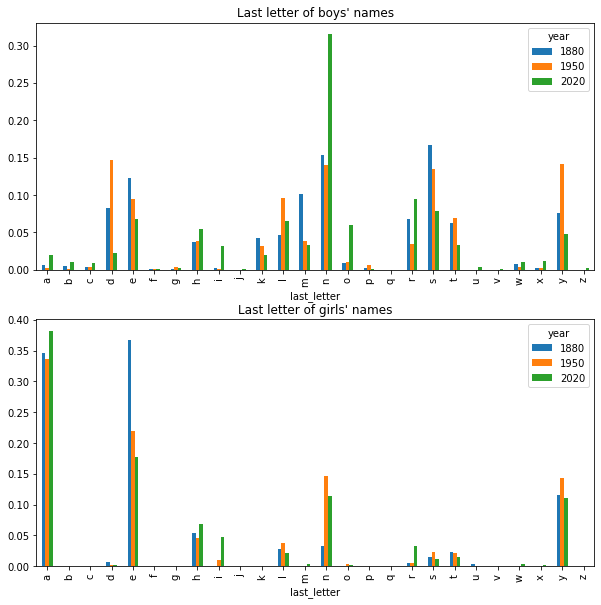

In [35]:
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
subtable['M'].plot(kind='bar', ax=axes[0], title="Last letter of boys' names")
subtable['F'].plot(kind='bar', ax=axes[1], title="Last letter of girls' names")

In [36]:
# Normalizing the table
table = table / table.sum()

In [37]:
# Checking particular letters
aen = table.loc[['a', 'e', 'n'], 'F'].T
aen.head()

last_letter,a,e,n
year,,,
1880,0.345583,0.366848,0.033057
1881,0.343447,0.370624,0.032179
1882,0.338776,0.374595,0.033149
1883,0.341251,0.373160,0.034153
1884,0.338555,0.372728,0.034933


<AxesSubplot:title={'center':"A, E, and N as a last letter of girls' names over the years"}, xlabel='year'>

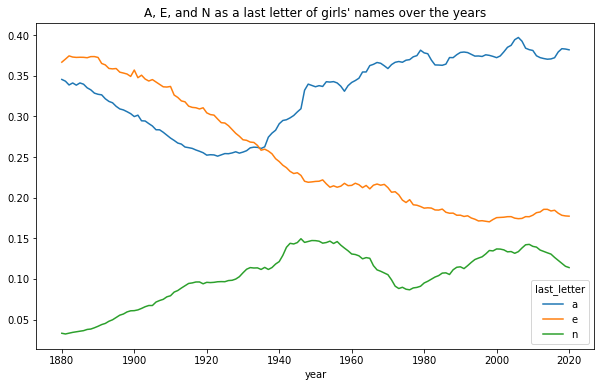

In [38]:
aen.plot(title="A, E, and N as a last letter of girls' names over the years", figsize=(10,6))

Boy names that became girl names (and vice versa)

In [39]:
all_names = pd.Series(names.name.unique())

In [40]:
# For example name Lesley or leslie
lesley_like = all_names[all_names.str.lower().str.startswith('lesl')]
lesley_like

654          Leslie
2354         Lesley
13681         Lesly
13987        Leslye
14945        Leslee
20649         Lesli
20850        Leslyn
21182         Lesle
21973      Lesleigh
22253        Leslea
26785     Leslieann
33336     Lesleyann
40297    Lesleyanne
41437     Leslianne
42277    Leslieanne
53024      Lesliann
58169        Leslei
61342       Leslian
63715       Lesliee
68735      Leslyann
76938        Leslly
dtype: object

In [41]:
filtered = names[names.name.isin(lesley_like)]
filtered.groupby('name').births.sum()

name
Lesle            187
Leslea           349
Leslee          4967
Leslei            52
Lesleigh         487
Lesley         38910
Lesleyann         86
Lesleyanne        80
Lesli           5720
Leslian           27
Lesliann           6
Leslianne         10
Leslie        380951
Leslieann        472
Leslieanne        93
Lesliee            8
Leslly             5
Lesly          14930
Leslyann          16
Leslye          2410
Leslyn           166
Name: births, dtype: int64

In [42]:
gb = filtered.groupby(['year', 'sex']).births.sum()
gb = gb.unstack()

In [43]:
gb = gb.div(gb.sum(1), axis=0)
gb

sex,F,M
year,,
1880,0.091954,0.908046
1881,0.106796,0.893204
1882,0.065693,0.934307
1883,0.053030,0.946970
1884,0.107143,0.892857
...,...,...
2016,0.954350,0.045650
2017,0.956055,0.043945
2018,0.958651,0.041349


<AxesSubplot:xlabel='year'>

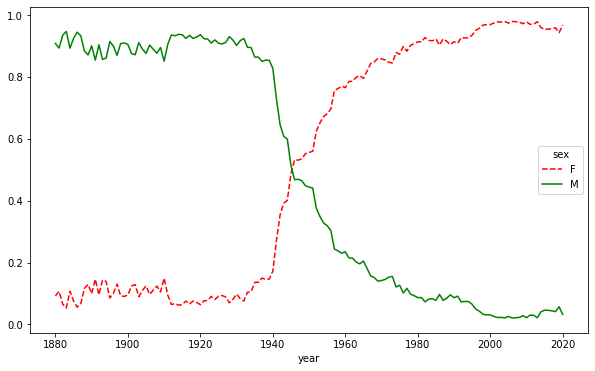

In [44]:
gb.plot(style={'M': 'g-', 'F': 'r--'}, figsize=(10,6))